<a href="https://colab.research.google.com/github/JKSmirny/hw_21.DeepLearningHomework_CharityFundingPredictor/blob/main/_CharityPredictorGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

# New Section

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,Jan-99,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


# New Section

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
charity_df = application_df.drop(['EIN'], axis=1)
charity_df = charity_df.drop(['NAME'], axis=1)
charity_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,Jan-99,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [4]:
# Determine the number of unique values in each column.
print(charity_df.nunique())

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [5]:
# Look at APPLICATION_TYPE value counts for binning
charity_bins = charity_df['APPLICATION_TYPE'].value_counts()
charity_bins = pd.DataFrame(charity_bins)
charity_bins

,APPLICATION_TYPE
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156
T13,66


In [6]:
# Check column data types
#charity_df.dtypes

In [7]:
# Check column data types
charity_bins.dtypes

APPLICATION_TYPE    int64
dtype: object

In [8]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(charity_bins[charity_bins < 500].index)
application_types_to_replace

['T3',
 'T4',
 'T6',
 'T5',
 'T19',
 'T8',
 'T7',
 'T10',
 'T9',
 'T13',
 'T12',
 'T2',
 'T25',
 'T14',
 'T29',
 'T15',
 'T17']

In [9]:
# Replace in dataframe
for app in application_types_to_replace:
    charity_df['APPLICATION_TYPE'] = charity_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
charity_df['APPLICATION_TYPE'].value_counts()
charity_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,Other,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,Other,Independent,C2000,Preservation,Co-operative,1,Jan-99,N,108590,1
2,Other,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,Other,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,Other,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,Other,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,Other,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,Other,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,Other,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [10]:
# Look at CLASSIFICATION value counts for binning
charity_classes = charity_df['CLASSIFICATION'].value_counts()
charity_classes

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [11]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classifications = charity_classes[charity_classes >1]
classifications = pd.DataFrame(classifications)
classifications

,CLASSIFICATION
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
C1700,287
C4000,194
C5000,116
C1270,114


In [12]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classifications[classifications < 2000].index)
classifications_to_replace

['C1000',
 'C2000',
 'C1200',
 'C3000',
 'C2100',
 'C7000',
 'C1700',
 'C4000',
 'C5000',
 'C1270',
 'C2700',
 'C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C1800',
 'C6000',
 'C1250',
 'C8200',
 'C1238',
 'C1278',
 'C1235',
 'C1237',
 'C7210',
 'C2400',
 'C1720',
 'C4100',
 'C1257',
 'C1600',
 'C1260',
 'C2710',
 'C0',
 'C3200',
 'C1234',
 'C1246',
 'C1267',
 'C1256']

In [13]:
# Replace in dataframe
charity_classes_df = charity_df
for cls in classifications_to_replace:
    charity_classes_df['CLASSIFICATION'] = charity_classes_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
charity_classes_df['CLASSIFICATION'].value_counts()

Other    34273
C1580        1
C1900        1
C1820        1
C6100        1
C1248        1
C2600        1
C1370        1
C5200        1
C4200        1
C2190        1
C1236        1
C2570        1
C3700        1
C2561        1
C2500        1
C1570        1
C1283        1
C2380        1
C1732        1
C1728        1
C2170        1
C4120        1
C8210        1
C4500        1
C1245        1
C2150        1
Name: CLASSIFICATION, dtype: int64

In [14]:
charity_classes_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,Other,Independent,Other,ProductDev,Association,1,0,N,5000,1
1,Other,Independent,Other,Preservation,Co-operative,1,Jan-99,N,108590,1
2,Other,CompanySponsored,Other,ProductDev,Association,1,0,N,5000,0
3,Other,CompanySponsored,Other,Preservation,Trust,1,10000-24999,N,6692,1
4,Other,Independent,Other,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,Other,Independent,Other,ProductDev,Association,1,0,N,5000,0
34295,Other,CompanySponsored,Other,ProductDev,Association,1,0,N,5000,0
34296,Other,CompanySponsored,Other,Preservation,Association,1,0,N,5000,0
34297,Other,Independent,Other,ProductDev,Association,1,0,N,5000,1


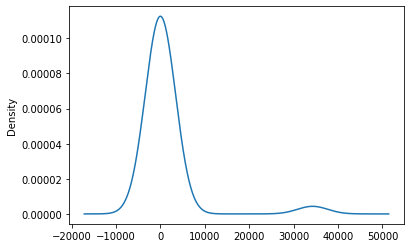

In [15]:
charity_classes_df.CLASSIFICATION.value_counts().plot.density()

In [35]:
# Convert categorical data to numeric with `pd.get_dummies`

classifications_df = pd.get_dummies(charity_classes_df,dtype=float)
classifications_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,...,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,INCOME_AMT_Jan-99,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1,5000,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
# Split our preprocessed data into our features and target arrays
y = classifications_df['IS_SUCCESSFUL'].values
y

array([1, 1, 0, ..., 0, 1, 0])

In [18]:
# Drop the column 'IS_SUCCESSUL'
X = classifications_df.drop('IS_SUCCESSFUL', axis=1).values
X

array([[1.0000000e+00, 5.0000000e+03, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.0859000e+05, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 5.0000000e+03, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       ...,
       [1.0000000e+00, 5.0000000e+03, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 5.0000000e+03, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 3.6500179e+07, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]])

In [19]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [20]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [21]:
X_train.shape

(25724, 56)

In [22]:
y_train.shape

(25724,)

## Compile, Train and Evaluate the Model

In [41]:
# Model 1 "nn"
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=7
hidden_nodes_layer2=14
hidden_nodes_layer3=21
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 7)                 399       
                                                                 
 dense_8 (Dense)             (None, 14)                112       
                                                                 
 dense_9 (Dense)             (None, 21)                315       
                                                                 
 dense_10 (Dense)            (None, 1)                 22        
                                                                 
Total params: 848
Trainable params: 848
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [46]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,validation_split=0.15, epochs=50)

Epoch 1/50
684/684 [==============================] - 2s 2ms/step - loss: 0.6280 - accuracy: 0.6749 - val_loss: 0.5972 - val_accuracy: 0.7111
Epoch 2/50
684/684 [==============================] - 1s 2ms/step - loss: 0.6066 - accuracy: 0.6954 - val_loss: 0.5936 - val_accuracy: 0.7069
Epoch 3/50
684/684 [==============================] - 1s 2ms/step - loss: 0.6048 - accuracy: 0.6947 - val_loss: 0.5923 - val_accuracy: 0.7100
Epoch 4/50
684/684 [==============================] - 1s 2ms/step - loss: 0.6037 - accuracy: 0.6953 - val_loss: 0.5922 - val_accuracy: 0.7087
Epoch 5/50
684/684 [==============================] - 1s 2ms/step - loss: 0.6030 - accuracy: 0.6962 - val_loss: 0.5929 - val_accuracy: 0.7085
Epoch 6/50
684/684 [==============================] - 1s 2ms/step - loss: 0.6029 - accuracy: 0.6949 - val_loss: 0.5902 - val_accuracy: 0.7085
Epoch 7/50
684/684 [==============================] - 1s 2ms/step - loss: 0.6020 - accuracy: 0.6969 - val_loss: 0.5923 - val_accuracy: 0.7100
Epoch 

In [47]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5999 - accuracy: 0.6956 - 304ms/epoch - 1ms/step
Loss: 0.5998945832252502, Accuracy: 0.6956267952919006


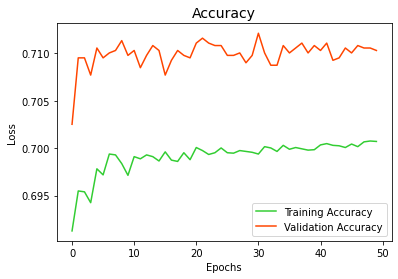

In [72]:
history = nn
import matplotlib.pyplot as plt
plt.plot(fit_model.history['accuracy'], 'limegreen', label='Training Accuracy')
plt.plot(fit_model.history['val_accuracy'], 'orangered',label='Validation Accuracy')
plt.title('Accuracy',fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [52]:
# Model 2 "nn_model"
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len( X_train_scaled[0])

hidden_nodes_layer1=20
hidden_nodes_layer2=40
hidden_nodes_layer3=1


nn_model = tf.keras.models.Sequential()

In [53]:
# first hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# output layer 
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 20)                1140      
                                                                 
 dense_18 (Dense)            (None, 40)                840       
                                                                 
 dense_19 (Dense)            (None, 1)                 41        
                                                                 
Total params: 2,021
Trainable params: 2,021
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Compile the model
nn_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [55]:
# Train the model
fit_model = nn_model.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)

Epoch 1/100
684/684 [==============================] - 2s 2ms/step - loss: 0.6172 - accuracy: 0.6831 - val_loss: 0.5938 - val_accuracy: 0.7113
Epoch 2/100
684/684 [==============================] - 1s 2ms/step - loss: 0.6040 - accuracy: 0.6960 - val_loss: 0.5903 - val_accuracy: 0.7116
Epoch 3/100
684/684 [==============================] - 1s 2ms/step - loss: 0.6027 - accuracy: 0.6972 - val_loss: 0.5929 - val_accuracy: 0.7100
Epoch 4/100
684/684 [==============================] - 1s 2ms/step - loss: 0.6019 - accuracy: 0.6972 - val_loss: 0.5968 - val_accuracy: 0.7087
Epoch 5/100
684/684 [==============================] - 1s 2ms/step - loss: 0.6018 - accuracy: 0.6977 - val_loss: 0.5986 - val_accuracy: 0.7100
Epoch 6/100
684/684 [==============================] - 1s 2ms/step - loss: 0.6011 - accuracy: 0.6983 - val_loss: 0.5943 - val_accuracy: 0.7108
Epoch 7/100
684/684 [==============================] - 1s 2ms/step - loss: 0.6013 - accuracy: 0.6978 - val_loss: 0.5937 - val_accuracy: 0.7105

In [56]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6037 - accuracy: 0.6967 - 325ms/epoch - 1ms/step
Loss: 0.6036681532859802, Accuracy: 0.6966763734817505


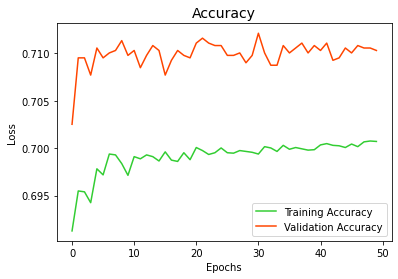

In [71]:
history = nn_model
import matplotlib.pyplot as plt
plt.plot(fit_model.history['accuracy'], 'limegreen', label='Training Accuracy')
plt.plot(fit_model.history['val_accuracy'], 'orangered',label='Validation Accuracy')
plt.title('Accuracy',fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [62]:
# Model 1 "model"
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=90
hidden_nodes_layer2=60
hidden_nodes_layer3=30
hidden_nodes_layer4=1
model = tf.keras.models.Sequential()

# First hidden layer
model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Third hidden layer
model.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='relu'))

# Output layer
model.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation='sigmoid'))

# Check the structure of the model
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 90)                5130      
                                                                 
 dense_32 (Dense)            (None, 60)                5460      
                                                                 
 dense_33 (Dense)            (None, 30)                1830      
                                                                 
 dense_34 (Dense)            (None, 1)                 31        
                                                                 
Total params: 12,451
Trainable params: 12,451
Non-trainable params: 0
_________________________________________________________________


In [63]:
# Compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [64]:
# Train the model
fit_model = model.fit(X_train_scaled,y_train,validation_split=0.15, epochs=50)

Epoch 1/50
684/684 [==============================] - 2s 3ms/step - loss: 0.6121 - accuracy: 0.6913 - val_loss: 0.5970 - val_accuracy: 0.7025
Epoch 2/50
684/684 [==============================] - 2s 3ms/step - loss: 0.6040 - accuracy: 0.6955 - val_loss: 0.5936 - val_accuracy: 0.7095
Epoch 3/50
684/684 [==============================] - 2s 2ms/step - loss: 0.6027 - accuracy: 0.6954 - val_loss: 0.5920 - val_accuracy: 0.7095
Epoch 4/50
684/684 [==============================] - 2s 2ms/step - loss: 0.6023 - accuracy: 0.6943 - val_loss: 0.5952 - val_accuracy: 0.7077
Epoch 5/50
684/684 [==============================] - 2s 2ms/step - loss: 0.6023 - accuracy: 0.6978 - val_loss: 0.5922 - val_accuracy: 0.7105
Epoch 6/50
684/684 [==============================] - 2s 2ms/step - loss: 0.6023 - accuracy: 0.6972 - val_loss: 0.5960 - val_accuracy: 0.7095
Epoch 7/50
684/684 [==============================] - 2s 2ms/step - loss: 0.6015 - accuracy: 0.6994 - val_loss: 0.5941 - val_accuracy: 0.7100
Epoch 

In [65]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6053 - accuracy: 0.6970 - 329ms/epoch - 1ms/step
Loss: 0.60533607006073, Accuracy: 0.697026252746582


In [69]:
history = model

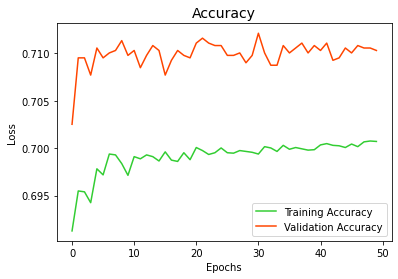

In [70]:
history = model
import matplotlib.pyplot as plt
plt.plot(fit_model.history['accuracy'], 'limegreen', label='Training Accuracy')
plt.plot(fit_model.history['val_accuracy'], 'orangered',label='Validation Accuracy')
plt.title('Accuracy',fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [76]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=80
hidden_nodes_layer2=30
hidden_nodes_layer3=1

model4 = tf.keras.models.Sequential()

# First hidden layer
model4.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
model4.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Output layer
model4.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='sigmoid'))

# Check the structure of the model
model4.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 80)                4560      
                                                                 
 dense_36 (Dense)            (None, 30)                2430      
                                                                 
 dense_37 (Dense)            (None, 1)                 31        
                                                                 
Total params: 7,021
Trainable params: 7,021
Non-trainable params: 0
_________________________________________________________________


In [77]:
# Compile the model
model4.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [78]:
# Train the model
fit_model = model4.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)

Epoch 1/100
684/684 [==============================] - 2s 2ms/step - loss: 0.6134 - accuracy: 0.6920 - val_loss: 0.5988 - val_accuracy: 0.6984
Epoch 2/100
684/684 [==============================] - 2s 2ms/step - loss: 0.6045 - accuracy: 0.6958 - val_loss: 0.5926 - val_accuracy: 0.7093
Epoch 3/100
684/684 [==============================] - 1s 2ms/step - loss: 0.6031 - accuracy: 0.6970 - val_loss: 0.5940 - val_accuracy: 0.7082
Epoch 4/100
684/684 [==============================] - 1s 2ms/step - loss: 0.6030 - accuracy: 0.6970 - val_loss: 0.5946 - val_accuracy: 0.7085
Epoch 5/100
684/684 [==============================] - 1s 2ms/step - loss: 0.6027 - accuracy: 0.6979 - val_loss: 0.5927 - val_accuracy: 0.7095
Epoch 6/100
684/684 [==============================] - 1s 2ms/step - loss: 0.6016 - accuracy: 0.6973 - val_loss: 0.5934 - val_accuracy: 0.7098
Epoch 7/100
684/684 [==============================] - 1s 2ms/step - loss: 0.6014 - accuracy: 0.6991 - val_loss: 0.5958 - val_accuracy: 0.7098

In [79]:
# Evaluate the model using the test data
model_loss, model_accuracy = model4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6107 - accuracy: 0.6976 - 329ms/epoch - 1ms/step
Loss: 0.610703706741333, Accuracy: 0.6976093053817749


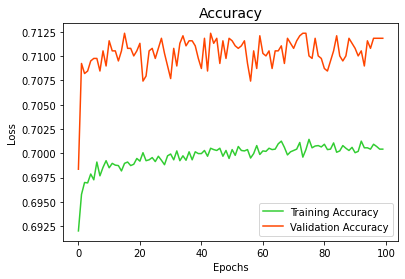

In [80]:
history = model4
import matplotlib.pyplot as plt
plt.plot(fit_model.history['accuracy'], 'limegreen', label='Training Accuracy')
plt.plot(fit_model.history['val_accuracy'], 'orangered',label='Validation Accuracy')
plt.title('Accuracy',fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [81]:
# Export our model to HDF5 file
from google.colab import files

nn.save('/content/Model_graph1.h5')
files.download('/content/Model_graph1.h5')

nn_model.save('/content/Model_graph2.h5')
files.download('/content/Model_graph2.h5')

model.save('/content/Model_graph3.h5')
files.download('/content/Model_graph3.h5')

model4.save('/content/Model_graph4.h5')
files.download('/content/Model_graph4.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>